In [ ]:
#!/usr/bin/env python

# # Imports

# Numerical and data processing libraries
import pandas as pd
import pickle

# Custom libraries

from libs.paths import data_folder, results_folder
from libs import preprocessing_lib as pplib
import matplotlib.pyplot as plt

In [48]:
# # %% ULSGE Dataset results
# # Import Original

data_file_path = data_folder / "chvnge_df.pkl"
ecg_df = pd.read_pickle(data_file_path)

print(ecg_df.head())

df = ecg_df
# Drop empty columns
df = df.drop(index=[491, 503])
df = df.reset_index(drop=True)
# Resample them to 50 Hz
# Optimize the processing of the dataset
df['ECG Signal'] = df['ECG Signal'].apply(
    lambda data: pplib.downsample(data, 500, 50))

# Load Estimates
results_file_path = results_folder / "QT_estimates.csv"
est_intervals_df = pd.read_csv(results_file_path)

print(est_intervals_df.columns)

# Import Predictions

results_file_path = results_folder / "ecg_unet_predictions.pkl"
with open(results_file_path, 'rb') as f:
    predictions = pickle.load(f)

print(f"Loaded predictions successfully: {type(predictions)}")

# Import Features

results_file_path = results_folder / "ecg_features.pkl"
with open(results_file_path, 'rb') as f:
    features = pickle.load(f)

print(f"Loaded predictions successfully: {type(features)}")

   ID Auscultation Point                                         ECG Signal  \
0   1                 AV  [4095, 4095, 4095, 4095, 4095, 4095, 4095, 409...   
1   1                 MV  [2631, 2627, 2625, 2622, 2619, 2617, 2617, 261...   
2   1                 PV  [2856, 2853, 2853, 2853, 2854, 2856, 2857, 285...   
3   1                 TV  [3062, 3060, 3057, 3054, 3052, 3050, 3049, 304...   
4   2                 AV  [162, 137, 137, 161, 196, 228, 243, 233, 203, ...   

                                          PCG Signal  
0  [0.3434741497039795, 0.4837189316749573, 0.523...  
1  [0.48249417543411255, 0.6795989274978638, 0.73...  
2  [0.31928005814552307, 0.44641613960266113, 0.4...  
3  [0.3670695424079895, 0.5156227350234985, 0.556...  
4  [0.3528915345668793, 0.496698260307312, 0.5378...  
Index(['ecg_2', 'ecg_3', 'Intervals_start_times', 'Intervals_end_times',
       'Intervals_mid_times', 'Filtered_Intervals_start_times',
       'Filtered_Intervals_end_times', 'Filtered_Intervals

In [50]:
print(len(features['Shannon'].iloc[0]))

1538


In [51]:
print(len(predictions[0]))

1538


In [52]:
features.columns

Index(['Patient ID', 'Hilbert', 'Shannon', 'Homomorphic', 'Hamming'], dtype='object')

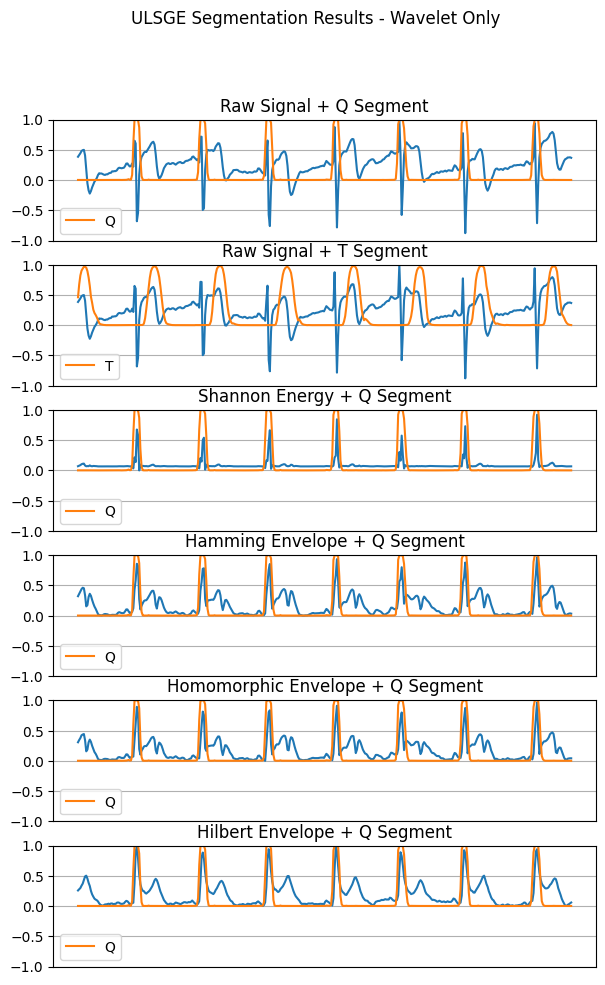

In [57]:
import matplotlib.pyplot as plt

# Create main figure with subplots
fig, axes = plt.subplots(6, 1, figsize=(7, 11), sharex=True, sharey=True)
fig.suptitle('ULSGE Segmentation Results - Wavelet Only')

# First plot: Raw Signal with Q segment
axes[0].plot(pplib.min_max_norm2(df.iloc[620, 2])[380:800])
axes[0].plot(predictions[620][380:800, 2], label='Q')
axes[0].set_title('Raw Signal + Q Segment')
axes[0].set_xticks([])
axes[0].set_ylim(-1, 1)
axes[0].legend(loc=3)
axes[0].grid()

# Second plot: Raw Signal with T segment
axes[1].plot(pplib.min_max_norm2(df.iloc[620, 2])[380:800])
axes[1].plot(predictions[620][380:800, 3], label='T')
axes[1].set_title('Raw Signal + T Segment')
axes[1].set_xticks([])
axes[1].set_ylim(-1, 1)
axes[1].legend(loc=3)
axes[1].grid()

# Third plot: Shannon Feature + Q segment
axes[2].plot(features['Shannon'].iloc[620][380:800])
axes[2].plot(predictions[620][380:800, 2], label='Q')
axes[2].set_title('Shannon Energy + Q Segment')
axes[2].set_xticks([])
axes[2].set_ylim(-1, 1)
axes[2].legend(loc=3)
axes[2].grid()

# Fourth plot: Hamming Feature + Q segment
axes[3].plot(features['Hamming'].iloc[620][380:800])
axes[3].plot(predictions[620][380:800, 2], label='Q')
axes[3].set_title('Hamming Envelope + Q Segment')
axes[3].set_xticks([])
axes[3].set_ylim(-1, 1)
axes[3].legend(loc=3)
axes[3].grid()

# Fifth plot: Homomorphic Feature + Q segment
axes[4].plot(features['Homomorphic'].iloc[620][380:800])
axes[4].plot(predictions[620][380:800, 2], label='Q')
axes[4].set_title('Homomorphic Envelope + Q Segment')
axes[4].set_xticks([])
axes[4].set_ylim(-1, 1)
axes[4].legend(loc=3)
axes[4].grid()

# Sixth plot: Hilbert Feature + Q segment
axes[5].plot(features['Hilbert'].iloc[620][380:800])
axes[5].plot(predictions[620][380:800, 2], label='Q')
axes[5].set_title('Hilbert Envelope + Q Segment')
axes[5].set_xticks([])
axes[5].set_ylim(-1, 1)
axes[5].legend(loc=3)
axes[5].grid()

# Save the plot
plt.savefig("plot_predictions.png")  # Save as PNG

plt.show()